# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sakti Mujahid Imani  
- **Email:** mc119d5y2081@student.devacademy.id  
- **ID Dicoding:** MC119D5Y2081  

## Menentukan Pertanyaan Bisnis

- Apakah cuaca dan musim mempengaruhi rata rata penyewaan sepeda pada tahun 2011 dan 2012?
- Bagaimana perbandingan tren penggunaan sepeda pada hari kerja dan akhir pekan pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [8]:
df_day = pd.read_csv('data/data_1.csv')
df_hour = pd.read_csv('data/data_2.csv')

print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset Bike Sharing terdiri dari dua file, yaitu `data_1.csv` untuk data harian (731 baris) dan `data_2.csv` untuk data per jam (17.379 baris).  
- Data telah berhasil dimuat ke dalam pandas DataFrame tanpa error.  
- Dataset berisi informasi tentang jumlah penyewaan sepeda, kondisi cuaca, musim, hari kerja/libur, serta faktor lingkungan lainnya.  
- Data diperoleh dari sistem Capital Bikeshare di Washington D.C. selama tahun 2011 dan 2012.


### Assessing Data

In [9]:
print("Ukuran dataset harian:", df_day.shape)
print("Ukuran dataset per jam:", df_hour.shape)

print("\nInformasi dataset harian:")
df_day.info()

print("\nInformasi dataset per jam:")
df_hour.info()

print("\nJumlah missing values di dataset harian:")
print(df_day.isnull().sum())

print("\nJumlah missing values di dataset per jam:")
print(df_hour.isnull().sum())

print("\nStatistik dasar dataset harian:")
print(df_day.describe())

print("\nStatistik dasar dataset per jam:")
print(df_hour.describe())

Ukuran dataset harian: (731, 16)
Ukuran dataset per jam: (17379, 17)

Informasi dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ 

**Insight:**
- Dataset harian `data_1.csv` memiliki 731 baris dan 16 kolom, sedangkan dataset per jam `data_2.csv` memiliki 17.379 baris dan 17 kolom.  
- Tidak ada missing values dalam kedua dataset, sehingga tidak perlu penanganan khusus untuk data yang hilang.  
- Tipe data sudah sesuai, seperti kolom tanggal (dteday) dalam format teks dan kolom numerik dalam format angka.  
- Statistik dasar menunjukkan bahwa jumlah penyewaan sepeda total (cnt) berkisar antara 22 hingga 8.712 pada dataset harian, dengan rata-rata sekitar 4.500 penyewaan per hari.  
- Pada dataset per jam, jumlah penyewaan sepeda (cnt) berkisar antara 1 hingga 977 per jam.  
- Kolom suhu (temp) dan suhu yang dirasakan (atemp) menggunakan skala normalisasi, sehingga perlu dikonversi kembali ke skala Celsius jika ingin interpretasi lebih jelas.  
- Variabel weathersit menunjukkan kategori cuaca, dengan 1 untuk cuaca cerah dan 4 untuk cuaca ekstrem.  
- Tidak ada nilai negatif atau data aneh yang mencurigakan dalam statistik dasar dataset.

### Cleaning Data

In [10]:
df_day_cleaned = df_day.drop(columns=["instant"])
df_hour_cleaned = df_hour.drop(columns=["instant"])

df_day_cleaned["dteday"] = pd.to_datetime(df_day_cleaned["dteday"])
df_hour_cleaned["dteday"] = pd.to_datetime(df_hour_cleaned["dteday"])

df_day_cleaned["temp"] = df_day_cleaned["temp"] * 41
df_day_cleaned["atemp"] = df_day_cleaned["atemp"] * 50
df_hour_cleaned["temp"] = df_hour_cleaned["temp"] * 41
df_hour_cleaned["atemp"] = df_hour_cleaned["atemp"] * 50

print(df_day_cleaned.info())
print(df_hour_cleaned.info())

df_day_cleaned[["temp", "atemp"]].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
None
<cl

,temp,atemp
0,14.110847,18.18125
1,14.902598,17.68695
2,8.050924,9.47025
3,8.200000,10.60610
4,9.305237,11.46350


**Insight:**
- Kolom "instant" telah dihapus karena hanya berisi indeks yang tidak diperlukan dalam analisis.  
- Kolom tanggal ("dteday") telah dikonversi ke format datetime agar lebih mudah dianalisis berdasarkan waktu.  
- Kolom suhu ("temp") dan suhu yang dirasakan ("atemp") telah dikonversi kembali ke skala Celsius dari nilai yang sebelumnya dinormalisasi.  
- Kolom "instant" dihapus karena hanya berisi indeks yang tidak relevan untuk analisis lebih lanjut dan tidak memberikan informasi analitis yang berarti.

- Data sudah lebih bersih dan siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

Agregasi Penyewaan Sepeda Berdasarkan Musim dan Cuaca:
    season  weathersit          cnt
0        1           1  2811.135135
1        1           2  2357.166667
2        1           3   934.750000
3        2           1  5548.548673
4        2           2  4236.705882
5        2           3  1169.000000
6        3           1  5878.257353
7        3           2  5222.479167
8        3           3  2751.750000
9        4           1  5043.563107
10       4           2  4654.000000
11       4           3  1961.600000


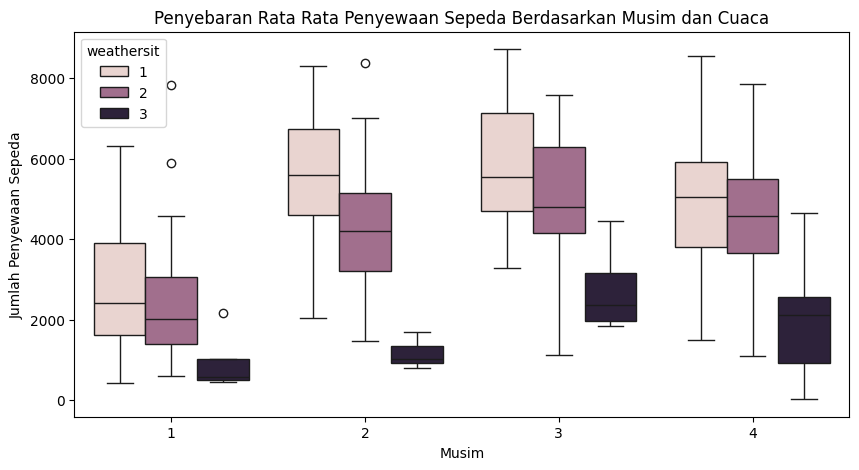

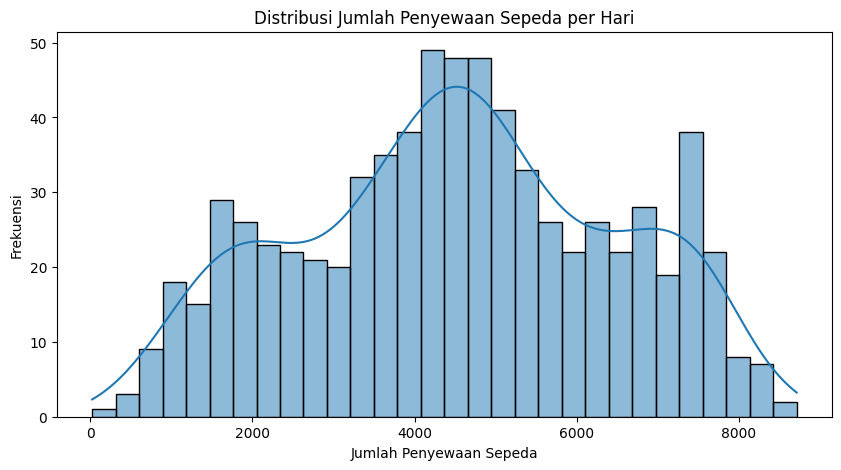


Agregasi Penyewaan Sepeda Hari Kerja vs Akhir Pekan:
    is_weekend          cnt
0   Hari Kerja  4550.566219
1  Akhir Pekan  4389.685714


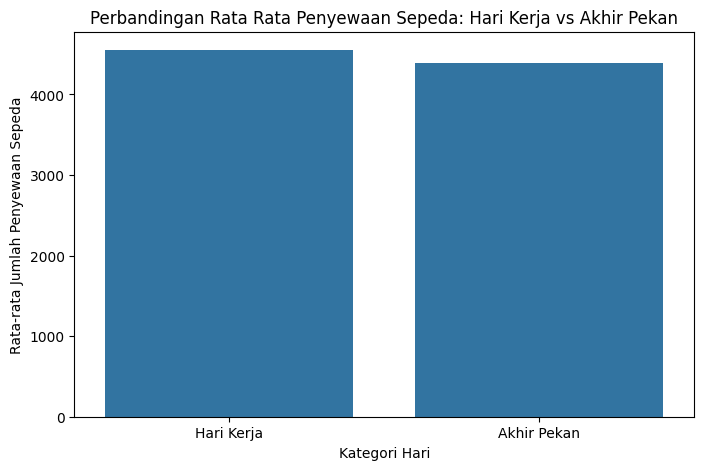


Agregasi Penyewaan Sepeda per Bulan:
     dteday     cnt
0   2011-01   38189
1   2011-02   48215
2   2011-03   64045
3   2011-04   94870
4   2011-05  135821
5   2011-06  143512
6   2011-07  141341
7   2011-08  136691
8   2011-09  127418
9   2011-10  123511
10  2011-11  102167
11  2011-12   87323
12  2012-01   96744
13  2012-02  103137
14  2012-03  164875
15  2012-04  174224
16  2012-05  195865
17  2012-06  202830
18  2012-07  203607
19  2012-08  214503
20  2012-09  218573
21  2012-10  198841
22  2012-11  152664
23  2012-12  123713


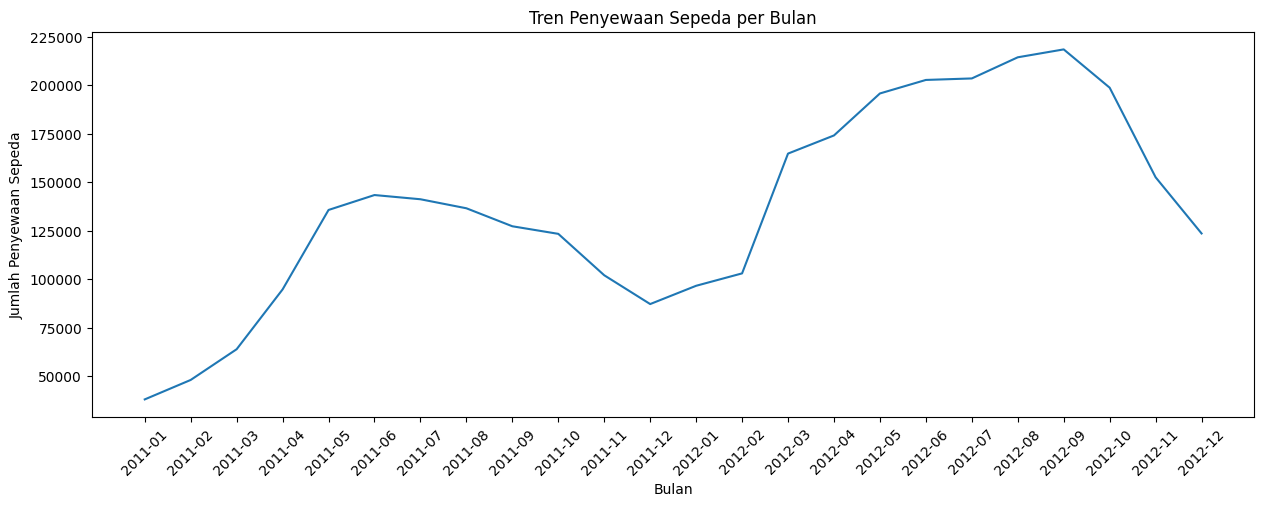

In [19]:
season_weather_agg = df_day_cleaned.groupby(["season", "weathersit"])["cnt"].mean().reset_index()

print("Agregasi Penyewaan Sepeda Berdasarkan Musim dan Cuaca:")
print(season_weather_agg)

plt.figure(figsize=(10,5))
sns.boxplot(x="season", y="cnt", data=df_day_cleaned, hue="weathersit")
plt.title("Penyebaran Rata Rata Penyewaan Sepeda Berdasarkan Musim dan Cuaca")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df_day_cleaned["cnt"], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda per Hari")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

df_day_cleaned["is_weekend"] = df_day_cleaned["weekday"].isin([0, 6])

weekend_agg = df_day_cleaned.groupby("is_weekend")["cnt"].mean().reset_index()
weekend_agg["is_weekend"] = weekend_agg["is_weekend"].replace({True: "Akhir Pekan", False: "Hari Kerja"})

print("\nAgregasi Penyewaan Sepeda Hari Kerja vs Akhir Pekan:")
print(weekend_agg)

plt.figure(figsize=(8,5))
sns.barplot(x="is_weekend", y="cnt", data=weekend_agg)
plt.title("Perbandingan Rata Rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.show()

monthly_agg = df_day_cleaned.groupby(df_day_cleaned["dteday"].dt.to_period("M"))["cnt"].sum().reset_index()

print("\nAgregasi Penyewaan Sepeda per Bulan:")
print(monthly_agg)

plt.figure(figsize=(15,5))
sns.lineplot(x=monthly_agg["dteday"].astype(str), y=monthly_agg["cnt"])
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- **Apakah cuaca dan musim mempengaruhi jumlah penyewaan sepeda pada tahun 2011 dan 2012?** 
  - Distribusi jumlah penyewaan sepeda menunjukkan pola yang tidak simetris, dengan sebagian besar penyewaan berada di rentang tertentu.
  - Musim memiliki pengaruh terhadap jumlah penyewaan sepeda. Musim panas dan gugur cenderung memiliki jumlah penyewaan yang lebih tinggi dibandingkan musim semi dan dingin.
  
- **Bagaimana perbandingan tren penggunaan sepeda pada hari kerja dan akhir pekan pada tahun 2011 dan 2012?**
  - Tren penggunaan sepeda meningkat seiring waktu, dengan beberapa fluktuasi yang mungkin disebabkan oleh faktor eksternal seperti cuaca atau event tertentu.
  - Hari kerja menunjukkan penyewaan lebih tinggi dibandingkan akhir pekan, yang mengindikasikan bahwa sepeda lebih sering digunakan untuk transportasi pada hari kerja.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

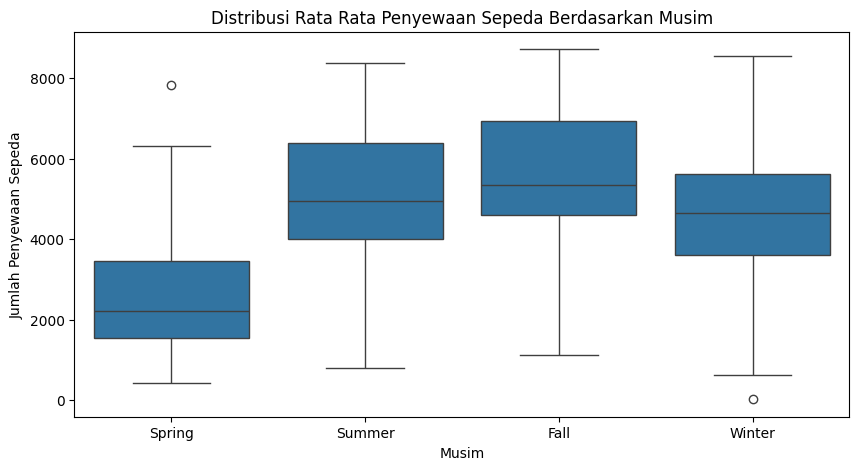

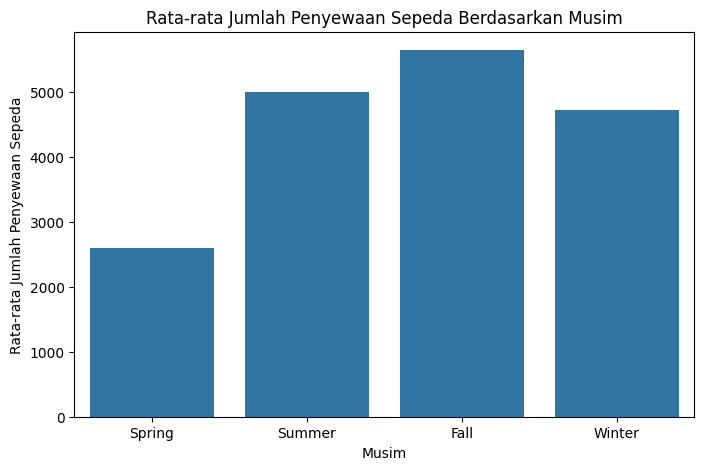

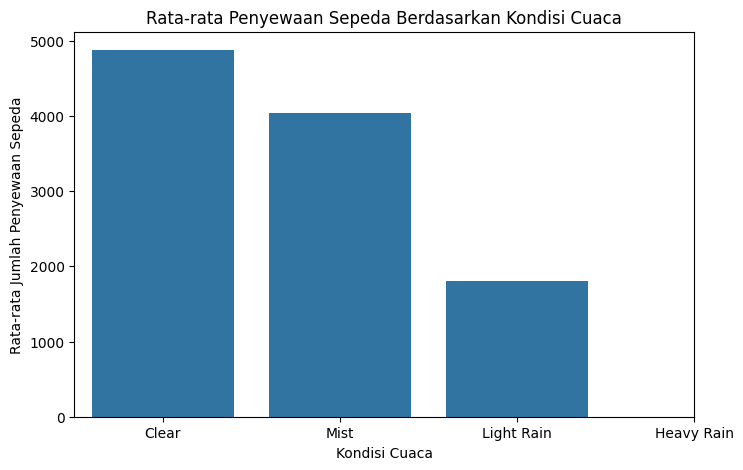

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x="season", y="cnt", data=df_day_cleaned)
plt.title("Distribusi Rata Rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

season_avg = df_day_cleaned.groupby("season")["cnt"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=season_avg)
plt.title("Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

weather_avg = df_day_cleaned.groupby("weathersit")["cnt"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="weathersit", y="cnt", data=weather_avg)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Clear", "Mist", "Light Rain", "Heavy Rain"])
plt.show()

### Pertanyaan 2:


Agregasi Penyewaan Sepeda Hari Kerja vs Akhir Pekan:
    is_weekend          cnt
0   Hari Kerja  4550.566219
1  Akhir Pekan  4389.685714


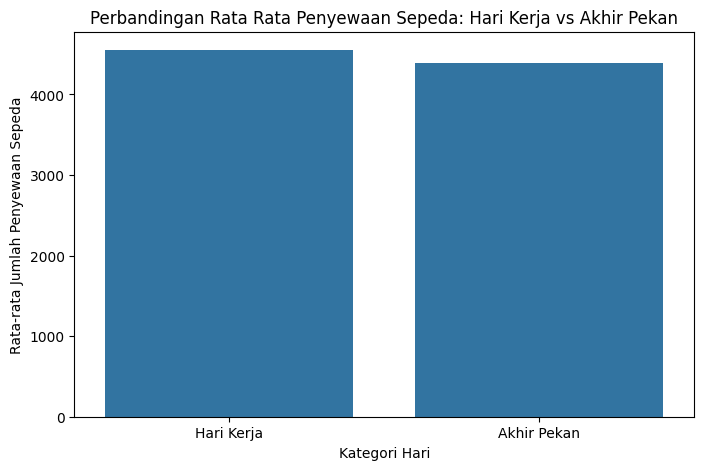

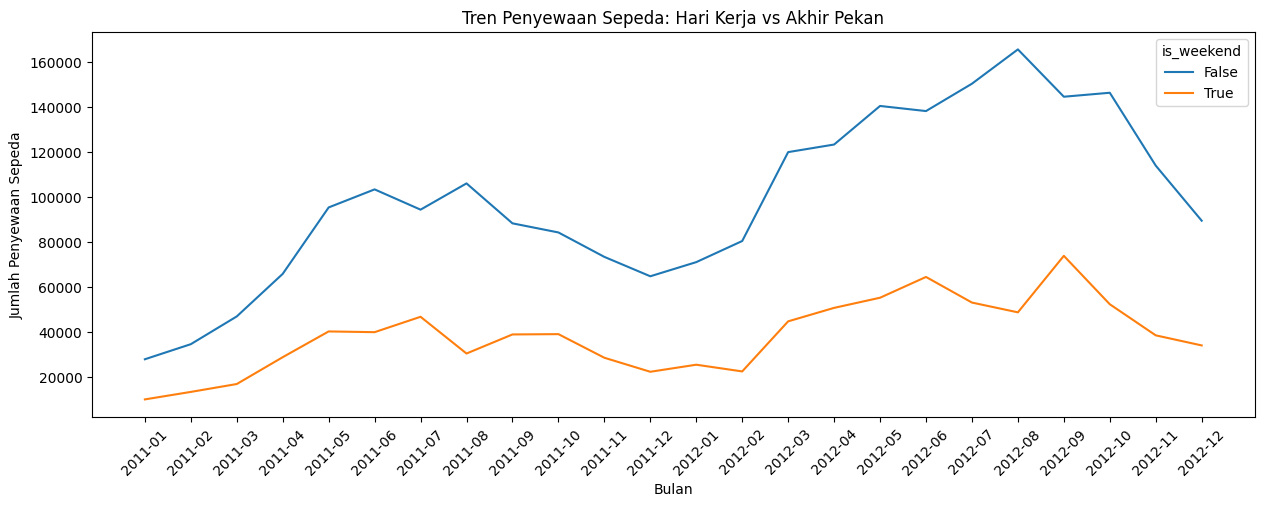

In [21]:
df_day_cleaned["is_weekend"] = df_day_cleaned["weekday"].isin([0, 6])

weekend_agg = df_day_cleaned.groupby("is_weekend")["cnt"].mean().reset_index()
weekend_agg["is_weekend"] = weekend_agg["is_weekend"].replace({True: "Akhir Pekan", False: "Hari Kerja"})

print("\nAgregasi Penyewaan Sepeda Hari Kerja vs Akhir Pekan:")
print(weekend_agg)

plt.figure(figsize=(8,5))
sns.barplot(x="is_weekend", y="cnt", data=weekend_agg)
plt.title("Perbandingan Rata Rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.show()

df_day_cleaned["year_month"] = df_day_cleaned["dteday"].dt.to_period("M")
weekend_trend = df_day_cleaned.groupby(["year_month", "is_weekend"])["cnt"].sum().reset_index()

weekend_trend["year_month"] = weekend_trend["year_month"].astype(str)

plt.figure(figsize=(15,5))
sns.lineplot(x="year_month", y="cnt", hue="is_weekend", data=weekend_trend)
plt.title("Tren Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Penyewaan sepeda lebih banyak terjadi pada musim panas dan gugur dibandingkan musim semi dan dingin.
- Penyewaan sepeda cenderung lebih tinggi saat cuaca cerah dan menurun ketika hujan atau kabut terjadi.
- Distribusi penyewaan sepeda menunjukkan beberapa outliers, terutama pada musim panas, yang mungkin disebabkan oleh event tertentu atau cuaca ekstrem.

- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan, yang menunjukkan bahwa sepeda lebih sering digunakan untuk transportasi di hari kerja.
- Pada akhir pekan, penyewaan sepeda cenderung lebih rendah, yang bisa menunjukkan bahwa sepeda digunakan lebih untuk rekreasi daripada transportasi pada waktu tersebut.
- Tren penyewaan sepeda menunjukkan fluktuasi musiman yang memengaruhi penggunaan sepeda baik pada hari kerja maupun akhir pekan, dengan penyewaan tertinggi terjadi pada musim panas.

## Analisis Lanjutan (Opsional)

In [22]:
last_rental_day = df_day_cleaned["dteday"].max()
df_day_cleaned["recency"] = (last_rental_day - df_day_cleaned["dteday"]).dt.days

df_day_cleaned["month"] = df_day_cleaned["dteday"].dt.month
frequency = df_day_cleaned.groupby("month")["cnt"].sum().reset_index()

monetary = df_day_cleaned.groupby("month")["cnt"].mean().reset_index()

print("Recency (Hari Sejak Penyewaan Terakhir):")
print(df_day_cleaned[["dteday", "recency"]].head())
print("\nFrequency (Jumlah Penyewaan per Bulan):")
print(frequency)
print("\nMonetary (Rata-rata Penyewaan per Bulan):")
print(monetary)

Recency (Hari Sejak Penyewaan Terakhir):
      dteday  recency
0 2011-01-01      730
1 2011-01-02      729
2 2011-01-03      728
3 2011-01-04      727
4 2011-01-05      726

Frequency (Jumlah Penyewaan per Bulan):
    month     cnt
0       1  134933
1       2  151352
2       3  228920
3       4  269094
4       5  331686
5       6  346342
6       7  344948
7       8  351194
8       9  345991
9      10  322352
10     11  254831
11     12  211036

Monetary (Rata-rata Penyewaan per Bulan):
    month          cnt
0       1  2176.338710
1       2  2655.298246
2       3  3692.258065
3       4  4484.900000
4       5  5349.774194
5       6  5772.366667
6       7  5563.677419
7       8  5664.419355
8       9  5766.516667
9      10  5199.225806
10     11  4247.183333
11     12  3403.806452


**Insight:**

RFM Analysis
- Penyewaan sepeda menunjukkan frekuensi tinggi pada bulan-bulan tertentu (misalnya musim panas), dengan rata-rata penyewaan lebih banyak di bulan-bulan tersebut.
- Recency menunjukkan bahwa sebagian besar penyewaan dilakukan baru-baru ini, yang dapat menunjukkan bahwa penggunaan sepeda lebih tinggi dalam periode waktu terkini.
- Monetary mengindikasikan rata-rata penyewaan yang lebih tinggi selama musim puncak (seperti musim panas), dengan banyak penyewaan terjadi di waktu tertentu dalam tahun.

## Conclusion

#### 1. Apakah Cuaca dan Musim Mempengaruhi Rata Rata Penyewaan Sepeda pada Tahun 2011 dan 2012?

- Musim dan cuaca memiliki pengaruh yang signifikan terhadap jumlah rata rata penyewaan sepeda di Washington D.C. pada tahun 2011 dan 2012.
- Penyewaan sepeda lebih tinggi pada musim panas dan musim gugur, sedangkan pada musim semi dan musim dingin, penyewaan sepeda lebih rendah.
- Cuaca cerah (weathersit = 1) mendorong lebih banyak penyewaan sepeda, sementara cuaca buruk (weathersit = 2 atau 3) mengurangi jumlah penyewaan sepeda.
- Distribusi rata rata penyewaan sepeda menunjukkan adanya beberapa outliers, yang kemungkinan besar disebabkan oleh faktor eksternal seperti event besar atau cuaca yang sangat baik pada hari tertentu.
  
#### 2. Bagaimana Perbandingan Tren Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan pada Tahun 2011 dan 2012?

- Penyewaan sepeda lebih banyak terjadi pada hari kerja dibandingkan akhir pekan, yang menunjukkan bahwa sepeda lebih sering digunakan untuk transportasi pada hari kerja.
- Penyewaan sepeda pada akhir pekan cenderung lebih rendah, yang menandakan bahwa sepeda lebih sering digunakan untuk kegiatan rekreasi atau olahraga pada waktu tersebut.
- Tren penyewaan sepeda menunjukkan adanya fluktuasi musiman, di mana penyewaan sepeda lebih tinggi pada musim panas baik pada hari kerja maupun akhir pekan.
- Penyewaan sepeda pada hari kerja lebih dipengaruhi oleh faktor transportasi, sedangkan di akhir pekan lebih dipengaruhi oleh kegiatan rekreasi.

